In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
from scipy import interpolate
from ccfj import GetStationPairs
import pandas as pd
import yaml
import geopandas as gp
import openpyxl
from openpyxl import load_workbook
from concurrent.futures import ThreadPoolExecutor

from scipy.interpolate import make_interp_spline
from scipy.stats import ks_2samp
from scipy.spatial import ConvexHull

In [13]:
import sys
sys.path.append(r'../tools_F-J/')
from toollib_standard import maplib
from toollib_standard import mathlib
from toollib_standard import filelib
from toollib_standard import stacklib
from toollib_standard import plotlib

In [14]:
with open('a-project_repar.yml', 'r', encoding='utf-8') as f:
    proj = yaml.load(f.read(), Loader=yaml.FullLoader)
name_project = proj['name']
#name_project = 'project_repartrition/output_repar_03-01/'               # Harmon server
name_project

'project_repartition_v3.0/output_repar_test/'

In [15]:
with open('0_config.yml', 'r', encoding='utf-8') as f:
    dir_config = yaml.load(f.read(), Loader=yaml.FullLoader)
dir_project_workspace = dir_config['dir_project_workspace']
dir_CC_workspace = dir_config['dir_CC_workspace']
print('dir_CC_workspace: ', dir_CC_workspace)
print('dir_project_workspace: ', dir_project_workspace)
dir_project = os.path.join(dir_project_workspace, name_project)
print('dir_project: ', dir_project)

dir_CC_workspace:  /shdisk/rem2/Harmon/F-J/San/
dir_project_workspace:  /shdisk/rem2/Harmon/F-J/San/
dir_project:  /shdisk/rem2/Harmon/F-J/San/project_repartition_v3.0/output_repar_test/


In [16]:
filename = dir_project+'Basic_info.yml'
with open(filename, 'r', encoding='utf-8') as f:
    info_basic = yaml.load(f.read(), Loader=yaml.FullLoader)
filename_bi = dir_project+'Basic_info.npy'
info_basic_bi = np.load(filename_bi, allow_pickle='TRUE').item()      # setting dictionary

In [17]:
info_basic

{'Fs': 500,
 'd_end': 159,
 'd_len': 31,
 'd_start': 128,
 'dir_disp': 'disppick_test/',
 'dir_ds': 'ds_test/',
 'dir_image': 'image_test/',
 'dir_stack': 'stack_test/',
 'fftlen': 150000,
 'flag_onebit': 0,
 'flag_prewhiten': 1,
 'fstride': 8.0,
 'nThreads': 10,
 'name_CC': 'CC/CC_40/',
 'name_project': 'project_repartition_v3.0/output_repar_test/',
 'name_project_probes': 'project/output_FJSJ_17-01/',
 'name_project_targets': 'project/output_FJSJ_17-03/',
 'nf': 1500,
 'npts': 43200000,
 'overlaprate': 0.9,
 'segday': 1,
 'stalistname': 'stations_info',
 'tag': 'test',
 'y_end': 2015,
 'y_start': 2014}

In [18]:
name_project_probes = info_basic['name_project_probes']
name_project_targets = info_basic['name_project_targets']
dir_project_probes = os.path.join(dir_project_workspace, name_project_probes)
dir_project_targets = os.path.join(dir_project_workspace, name_project_targets)
print('dir_project_probes: ', dir_project_probes)
print('dir_project_targets: ', dir_project_targets)

dir_project_probes:  /shdisk/rem2/Harmon/F-J/San/project/output_FJSJ_17-01/
dir_project_targets:  /shdisk/rem2/Harmon/F-J/San/project/output_FJSJ_17-03/


In [19]:
filename = dir_project_probes+'Basic_info.yml'
with open(filename, 'r', encoding='utf-8') as f:
    info_basic_probes = yaml.load(f.read(), Loader=yaml.FullLoader)
filename_bi = dir_project_probes+'Basic_info.npy'
info_basic_bi_probes = np.load(filename_bi, allow_pickle='TRUE').item()      # setting dictionary

filename = dir_project_targets+'Basic_info.yml'
with open(filename, 'r', encoding='utf-8') as f:
    info_basic_targets = yaml.load(f.read(), Loader=yaml.FullLoader)

In [20]:
info_basic_probes

{'Fs': 500,
 'c_map': 'jet',
 'c_max': 2,
 'c_min': 0.2,
 'c_num': 800,
 'd_end': 159,
 'd_len': 31,
 'd_start': 128,
 'dir_disp': 'autopick17-01//',
 'dir_ds': 'ds_17-01/',
 'dir_image': 'image_17-01/',
 'dir_proj': 'project/output_FJSJ_17-01/',
 'dir_stack': 'stack_17-01/',
 'fftlen': 150000,
 'flag_onebit': 0,
 'flag_prewhiten': 1,
 'flag_time': 0.008,
 'fstride': 8.0,
 'interval': 1,
 'key_subworks': ['04-02',
  '05-02',
  '06-02',
  '07-02',
  '08-02',
  '09-02',
  '10-02',
  '11-02',
  '12-02',
  '13-02',
  '14-02',
  '15-02',
  '16-02',
  '17-02',
  '18-02',
  '19-02',
  '20-02',
  '21-02',
  '22-02',
  '23-02',
  '24-02',
  '25-02',
  '26-02',
  '27-02',
  '28-02',
  '29-02',
  '30-02',
  '31-02',
  '32-02',
  '33-02',
  '34-02',
  '35-02',
  '36-02',
  '37-02',
  '38-02',
  '39-02',
  '40-02',
  '41-02',
  '42-02',
  '43-02',
  '44-02',
  '45-02',
  '46-02',
  '47-02',
  '48-02',
  '49-02',
  '50-02',
  '51-02',
  '52-02',
  '53-02',
  '54-02',
  '55-02',
  '56-02',
  '57-02',

In [21]:
probes = info_basic_probes['key_subworks']
key_subworks = info_basic_targets['key_subworks']

In [22]:
dir_image = dir_project+info_basic['dir_image']
dir_disp_probes  = dir_project_probes + info_basic_probes['dir_disp'] 
print('dir_image: ', dir_image)
print('dir_disp: ', dir_disp_probes)

dir_image:  /shdisk/rem2/Harmon/F-J/San/project_repartition_v3.0/output_repar_test/image_test/
dir_disp:  /shdisk/rem2/Harmon/F-J/San/project/output_FJSJ_17-01/autopick17-01//


In [23]:
f = info_basic_bi_probes['f']
c = np.linspace(info_basic_probes['c_min'],info_basic_probes['c_max'],info_basic_probes['c_num'])
flag_c = [0.35,0.75]
flag_f = [10,15]
nThreads = 5
c_mean = {}
c_mean_data = np.zeros(len(f))
flag_plot = 0

### Plot to see pick results

(0.2, 2.0)

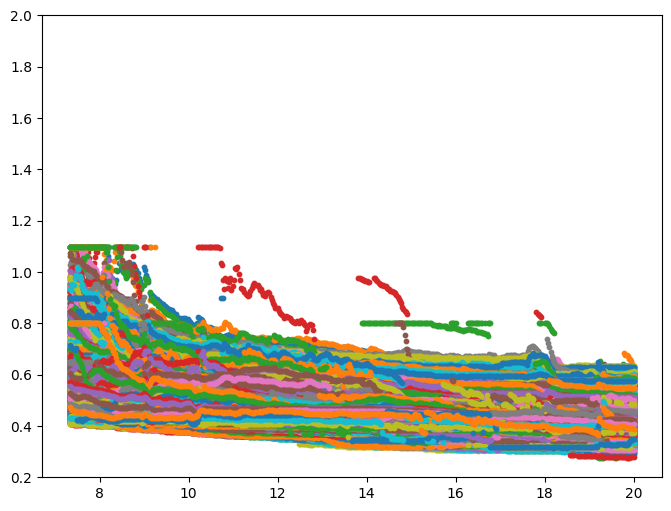

In [26]:

fig,ax = plt.subplots(1,1,figsize=(8,6))
for probe in probes:
    f_pick = np.loadtxt(dir_disp_probes+'autopick_'+probe+'.txt',delimiter=',')[:,0]
    c_pick = np.loadtxt(dir_disp_probes+'autopick_'+probe+'.txt',delimiter=',')[:,1]
    ax.scatter(f_pick,c_pick,marker='o',s=10)
ax.set_ylim([0.2,2])

### calculate K-S value to see the result

In [ ]:
def loc_key(key_subwork):
    global stalist_all
    global lat_all
    global lon_all
    key = 'R'+key_subwork[0:2]+key_subwork[3:]
    if key in stalist_all:
        lat_this = lat_all[stalist_all.index(key)]
        lon_this = lon_all[stalist_all.index(key)]
    else:
        key1 = 'R' + str(int(key_subwork[0:2])-1).zfill(2)+key_subwork[3:5]
        key2 = 'R' + str(int(key_subwork[0:2])+1).zfill(2)+key_subwork[3:5]
        indx1 = stalist_all.index(key1)
        indx2 = stalist_all.index(key2)
        lat_this= (lat_all[indx1]+lat_all[indx2])/2
        lon_this = (lon_all[indx1]+lon_all[indx2])/2
    return lon_this,lat_this

In [ ]:
def extract_probes(key_subwork):
    global dir_project
    global dir_project_probes
    global dir_project_targets
    global probes
    global stainfo_targets

    stas = stainfo_targets[key_subwork]['Station'].tolist()
    # 生成sta的包络
    #hull_sta = ConvexHull(stainfo_targets[key_subwork][['Longitude','Latitude']])

    stas2key = [sta[1:3]+'-'+sta[3:] for sta in stas]
    probes_this = []
    for sta in stas2key:
        if sta in probes:
            probes_this.append(sta)
    return probes_this

In [ ]:
stalistname_all = info_basic_probes['stalistname_all']
stainfo = pd.read_excel(stalistname_all)
nsta_all = len(stainfo.iloc[:,0])
StationPairs_all = GetStationPairs(nsta_all)
nPairs_all = int(len(StationPairs_all)/2)
stalist_all = stainfo['Station'].tolist() 
lat_all =  stainfo['latitude'].tolist() 
lon_all =  stainfo['longitude'].tolist() 
faults = np.load('clark_faults.npy', allow_pickle='TRUE').item()

In [ ]:
stalistname = dir_project_probes+ info_basic_probes['stalistname']
stainfo_probes = pd.read_excel(stalistname,sheet_name=None)
stalistname = dir_project_targets+ info_basic_targets['stalistname']
stainfo_targets = pd.read_excel(stalistname,sheet_name=None)

In [ ]:
def calculate_centroid(coordinates):
    return np.mean(coordinates, axis=0)

In [ ]:
def repartrition(key_subwork):
    global dir_image
    global dir_project
    global stainfo_probes
    global stainfo_targets
    global flag_c
    global flag_accept
    global lat_all
    global lon_all
    global stalist_all
    global flag_plot
    global lon_centroid_all
    global lat_centroid_all
    global stations_accept_all
    
    probes_this = extract_probes(key_subwork)
    stations = set()
    for probe in probes_this:
        stations_this = [station for station in stainfo_probes[probe]['Station'].tolist()]
        stations = stations.union(set(stations_this))
        
    stations = list(stations)
    lats = [lat_all[stalist_all.index(station)] for station in stations]
    lons = [lon_all[stalist_all.index(station)] for station in stations]

    lon_this = []
    lat_this = []
    for probe in probes_this:
        lon,lat = loc_key(probe)
        lon_this.append(lon)
        lat_this.append(lat)
    # 读取全部autopick dispersion curves
    disp_all = {}
    f_sample = np.array([])
    for probe in probes_this:
        file_ds = dir_project  + info_basic['dir_disp'] + 'autopick_'+probe+'.txt'
        if f_sample.size == 0:
            f_sample = np.loadtxt(file_ds,delimiter=',')[:,0]
            c_all = np.zeros([len(probes_this),len(f_sample)])
        disp_all[probe] = np.loadtxt(file_ds,delimiter=',')[:,1]
        c_all[probes_this.index(probe)] = disp_all[probe]
    
    # 计算平均值
    c_mean = []
    c_median = []
    for i in range(len(f_sample)):
        data = c_all[:,i]
        mean_value = np.mean(data)
        std_dev = np.std(data)
        threshold = 0.7  # 根据需要调整阈值
        outliers = [value for value in data if abs(value - mean_value) > threshold * std_dev]
        # 移除异常值
        cleaned_data = [value for value in data if value not in outliers]
        # 计算修正后的平均值
        trimmed_mean = np.mean(cleaned_data)
        #median = np.median(data)
        c_mean.append(trimmed_mean)
    # 对c_mean做平滑
    c_mean = smooth_data(c_mean, window_size=30)    
    
    # 计算k-S度量值
    ks_p_values = []
    ks_statistic = []
    for probe in probes_this:
        ks_statistic.append(ks_2samp(disp_all[probe],c_mean)[0])
        ks_p_values.append(ks_2samp(disp_all[probe],c_mean)[1])

    index_accept = np.array(ks_statistic)<flag_accept
    probe_accept = np.array(probes_this)[index_accept]

    # calculate all stations and accepted stations
    stations_this_all = set()
    for probe in probes_this:
        stations_this = [station for station in stainfo_probes[probe]['Station'].tolist()]
        stations_this_all = stations_this_all.union(set(stations_this))
    stations_this_all = list(stations_this_all)
    lat_this_all = [lat_all[stalist_all.index(station)] for station in stations_this_all]
    lon_this_all = [lon_all[stalist_all.index(station)] for station in stations_this_all]
    stations_accept = set()
    for probe in probe_accept:
        stations_this = [station for station in stainfo_probes[probe]['Station'].tolist()]
        stations_accept = stations_accept.union(set(stations_this))
    stations_accept = list(stations_accept)
    lat_accept = [lat_all[stalist_all.index(station)] for station in stations_accept]
    lon_accept = [lon_all[stalist_all.index(station)] for station in stations_accept]

    # calculate centroid
    lon_centroid,lat_centroid = calculate_centroid(np.array([lon_accept,lat_accept]).T)
    stations_accept_all[key_subwork] = stations_accept
    lon_centroid_all[key_subwork] = lon_centroid
    lat_centroid_all[key_subwork] = lat_centroid    
    print('finish '+key_subwork)
    # plot
    if flag_plot == 1:
        fig,ax = plt.subplots(2,3,figsize=(15,8))
        ax[0][0].scatter(lon_all, lat_all,marker='.',color='k',s=1)
        for i in range(len(faults)):
            ax[0][0].plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'k')
        ax[0][0].scatter(stainfo_targets[key_subwork]['longitude'], stainfo_targets[key_subwork]['latitude'],marker='.',color='r',s=10)
        ax[0][0].scatter(loc_key(key_subwork)[0], loc_key(key_subwork)[1],marker='^',color='g',s=50)
        ax[0][0].axis('off')

        ax[1][0].scatter(lon_all, lat_all,marker='.',color='k',s=1)
        for i in range(len(faults)):
            ax[1][0].plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'k')
            ax[1][0].scatter(lon_this, lat_this,marker='.',color='b',s=30)
            ax[1][0].scatter(lons,lats,marker='.',color='r',s=10)
        ax[1][0].scatter(loc_key(key_subwork)[0], loc_key(key_subwork)[1],marker='^',color='g',s=50)
        ax[1][0].axis('off')

        for probe in probes_this:
            ax[0][1].scatter(f_sample,disp_all[probe],marker='.',s=1)
        ax[0][1].plot(f_sample,c_mean,linestyle='--',color='k',linewidth=3)

        for probe in probe_accept:
            ax[1][1].scatter(f_sample,disp_all[probe],marker='o',s=1)
        ax[1][1].plot(f_sample,c_mean,linestyle='--',color='k',linewidth=3)
        ax[1][1].set_ylim(flag_c)

        """
        ax[1][2].scatter(lon_all, lat_all,marker='.',color='k',s=1)
        for i in range(len(faults)):
            ax[1][2].plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'k')
        ax[1][2].scatter(np.array(lon_this), np.array(lat_this),marker='.',color = 'blue',s=5)    
        ax[1][2].scatter(np.array(lon_this)[index_accept], np.array(lat_this)[index_accept],marker='.',color = 'r',s=20)
        ax[1][2].axis('off')
        """

        ax[0][2].scatter(lon_all, lat_all,marker='.',color='k',s=1)
        for i in range(len(faults)):
            ax[0][2].plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'k')
        im = ax[0][2].scatter(lon_this, lat_this,marker='.',c=ks_statistic,s=20,cmap = 'jet')
        ax[0][2].axis('off')
        plt.colorbar(im,ax=ax[0][2],shrink=0.5)


        ax[1][2].scatter(lon_all, lat_all,marker='.',color='k',s=1)
        for i in range(len(faults)):
            ax[1][2].plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'k')
        ax[1][2].scatter(lon_this_all, lat_this_all,marker='.',color='b',s=20)
        ax[1][2].scatter(lon_accept, lat_accept,marker='.',color='r',s=20)
        ax[1][2].scatter(lon_centroid, lat_centroid,marker='^',color='g',s=50)
        ax[1][2].axis('off')
        

        plt.tight_layout()
        plt.savefig(dir_image+'repartrition_'+key_subwork+'.png',dpi=60)
        plt.close()
    #return stations_accept,lon_centroid,lat_centroid
    return probe_accept

In [ ]:
flag_accept = 0.4
info_basic['flag_accept'] = flag_accept

In [ ]:
stations_accept_all = {}
lon_centroid_all = {}
lat_centroid_all = {}
"""
pool = ThreadPoolExecutor(max_workers = nThreads)
for key_subwork in key_subworks[0:3]:
    pool.submit(repartrition,key_subwork)
pool.shutdown()
"""
probe_accept_all = {}
for key_subwork in key_subworks:
    probe_accept_all[key_subwork] =repartrition(key_subwork)

### Analyze clusters and reunion

In [ ]:
# delete void sets
key_dels = []
for key_subwork in key_subworks:
    if len(stations_accept_all[key_subwork]) < 30:
        print(key_subwork)
        del stations_accept_all[key_subwork]
        del lon_centroid_all[key_subwork]
        del lat_centroid_all[key_subwork]
        key_dels.append(key_subwork)
for key_del in key_dels:
    key_subworks.remove(key_del)

In [ ]:
def check_lat_lon(key_subwork):
    global stations_accept_all_new
    global lon_centroid_all_new
    global lat_centroid_all_new
    global stations_accept_all
    global lon_centroid_all
    global lat_centroid_all
    global flag_subwork

    for key in stations_accept_all_new.keys():
        lon_centroid = lon_centroid_all_new[key]
        lat_centroid = lat_centroid_all_new[key]
        lon = lon_centroid_all[key_subwork]
        lat = lat_centroid_all[key_subwork]
        if lon_centroid == lon and lat_centroid == lat:
            print(key_subwork + ' merge into ' + str(key))
            stations_accept_all_new[key].union(set(stations_accept_all[key_subwork]))
            return

    flag_subwork += 1
    new_subwork = key_subwork + '--' + str(flag_subwork)
    stations_accept_all_new[new_subwork] = set(stations_accept_all[key_subwork])
    lon_centroid_all_new[new_subwork] = lon_centroid_all[key_subwork]
    lat_centroid_all_new[new_subwork] = lat_centroid_all[key_subwork]

In [ ]:
key_subworks_new = []
stations_accept_all_new = {}
lon_centroid_all_new = {}
lat_centroid_all_new = {}
flag_subwork = 0
for key_subwork in key_subworks:
    check_lat_lon(key_subwork)

In [ ]:
# 找到有对应的subwork的target
key_target_accept = []
lon_target_accept = []
lat_target_accept = []
for key_subwork in stations_accept_all_new.keys():
    key_target_accept.append(key_subwork[:key_subwork.find('--')])
    lon_this,lat_this = loc_key(key_subwork[:key_subwork.find('--')])
    lon_target_accept.append(lon_this)
    lat_target_accept.append(lat_this)

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.scatter(lon_all, lat_all,marker='.',color='k',s=1)
ax.scatter(lon_target_accept, lat_target_accept,marker='.',color='r',s=20)
for i in range(len(faults)):
    ax.plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'g--')
ax.axis('off')
    
ax = fig.add_subplot(122)
ax.scatter(lon_all, lat_all,marker='.',color='k',s=1)
for i in range(len(faults)):
    ax.plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'g--')
for key_subwork in stations_accept_all_new.keys():
    ax.scatter(lon_centroid_all_new[key_subwork],lat_centroid_all_new[key_subwork],c='r',marker='^',s=5)
ax.axis('off')
plt.tight_layout()
plt.savefig(dir_image + 'station_distribution.png')

In [ ]:
key_probe = {}
key_probe_accept = {}
for key_subwork in stations_accept_all_new.keys():
    key_target = key_subwork[:key_subwork.find('--')]
    probes_this = extract_probes(key_target)
    key_probe[key_subwork] = probes_this
    key_probe_accept[key_subwork] = probe_accept_all[key_target]
info_basic_bi['probe'] = key_probe
info_basic_bi['probe_accept'] = key_probe_accept

### Save to new subworks

In [ ]:
# 将key的坐标写入excel
filename = dir_project+'stations_info.xlsx'
if os.path.exists(filename):
    os.remove(filename)
df=pd.DataFrame()
df['key_subwork'] = list(stations_accept_all_new.keys())
df['lon_centroid'] = list(lon_centroid_all_new.values())
df['lat_centroid'] = list(lat_centroid_all_new.values())
#写入excel的"location"sheet中
df.to_excel(filename,sheet_name='location',index=False)

In [ ]:
books = load_workbook(filename)
writers = pd.ExcelWriter(filename, engine='openpyxl')
#writers.book = books

for key in stations_accept_all_new.keys():
    df=pd.DataFrame()
    df['Station'] = list(stations_accept_all_new[key])
    df['latitude'] = [lat_all[stalist_all.index(station)] for station in stations_accept_all_new[key]]
    df['longitude'] = [lon_all[stalist_all.index(station)] for station in stations_accept_all_new[key]]
    df.to_excel(writers, sheet_name=key,index=False)
writers._save()

In [ ]:
filename = dir_project + 'subwork_location.xlsx'
df=pd.DataFrame()
df['key_subwork'] = [str(key_subwork) for key_subwork in key_subworks]
df['lon_centroid'] = list(lon_centroid_all.values())
df['lat_centroid'] = list(lat_centroid_all.values())
df.to_excel(filename,sheet_name='location',index=False)

In [ ]:
info_basic['key_subworks'] = list(stations_accept_all_new.keys())
info_basic['stalistname_all'] = info_basic_probes['stalistname_all']
info_basic['stalistname'] = 'stations_info.xlsx'
info_basic['flag_f'] = flag_f
info_basic['flag_c'] = flag_c

In [ ]:
with open(dir_project+'Basic_info.yml', 'w', encoding='utf-8') as f:
   yaml.dump(data=info_basic, stream=f, allow_unicode=True)
np.save(dir_project + 'Basic_info.npy', info_basic_bi)